In [1]:
!pip install --upgrade pip
!pip install pandas_ta
import pandas as pd
import pandas_ta as ta # technical analysis
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

# reference
# Python for Finance by eMaster Class Academy on youtube


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [2]:
# load data from csv
data_train = pd.read_csv("stock_yfinance_data.csv")
prefix = datetime.today().strftime('%Y-%m-%d')
data_test = pd.read_csv(prefix+"-sp500.csv")

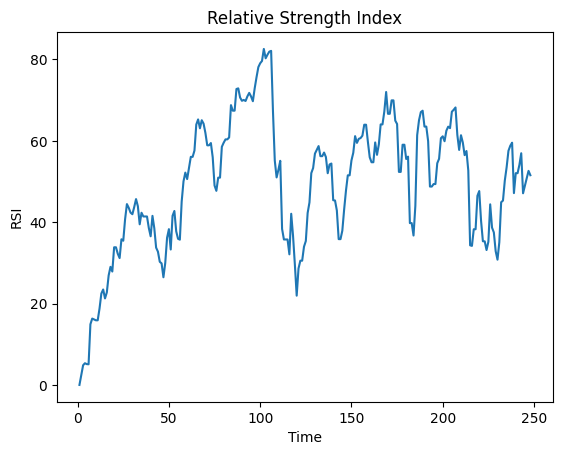

In [9]:
# Relative Strength Index (RSI) 
# RSI = 100 - 100 / (1 + RS)
# RS = Average Gain / Average Loss
# https://www.youtube.com/watch?v=yAaC4v8uqr8
# Plotting Relative Strength Index (RSI) Line Chart

def computer_RSI (data, time_window=14):
    #    rsi = ta.rsi(data, length=time_window)
    #    return rsi
    up_chg = data_test["High"] - data_test["High"].shift(1)
    down_chg = data_test["Low"].shift(1) - data_test["Low"]
    up_chg[up_chg < 0] = 0
    down_chg[down_chg < 0] = 0
    avg_gain = up_chg.ewm(com=time_window - 1, adjust=False).mean()
    avg_loss = down_chg.ewm(com=time_window - 1, adjust=False).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi_train = computer_RSI(data_train["Close"])
rsi_test = computer_RSI(data_test["Close"])
plt.plot(rsi_test)
plt.title("Relative Strength Index")
plt.ylabel("RSI")
plt.xlabel("Time")
plt.show()

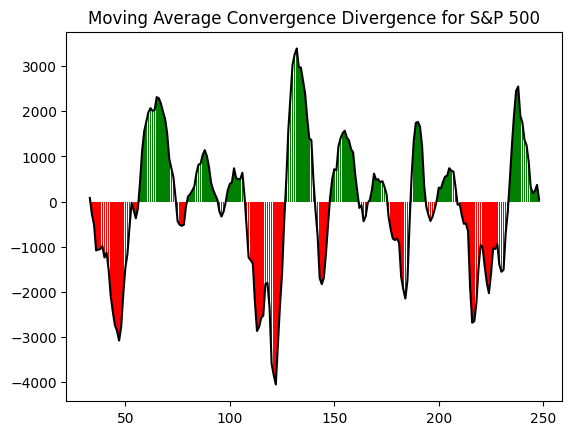

In [19]:
# https://www.youtube.com/watch?v=ErGU9sHO8wY
# Creating MACD and RSI technical indicators

# Moving Average Convergence Divergence (MACD) in percentage
macd_train = ta.macd(data_train["Close"]) * 100
macd_test = ta.macd(data_test["Close"]) * 100
#print (macd_train.head(30))
#print (macd_test.head(30))
#macd_test.info()
# plot
pos = macd_test["MACDh_12_26_9"] > 0
neg = macd_test["MACDh_12_26_9"] < 0
plt.plot(macd_test["MACDh_12_26_9"], color="black")
plt.bar(macd_test.index[pos], macd_test["MACDh_12_26_9"][pos], color="green")
plt.bar(macd_test.index[neg], macd_test["MACDh_12_26_9"][neg], color="red")
plt.title("Moving Average Convergence Divergence for S&P 500")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0dd8259a-6fe1-4bc5-8525-ca004ab195a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>